In [3]:
# import libaries
import nltk
import typing
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation for sentiment

## 1: Dealing with missing values and data structure

In [4]:
# Read the data from a csv file
data = pd.read_csv("../data/stock_data.csv")

In [5]:
# Confirming the data frame
type(data)

pandas.core.frame.DataFrame

In [6]:
# for showing all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

data.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [7]:
# Show the "shape" of the data to determine how many rows and columns are in the dataset
data.shape

(5791, 2)

In [8]:
"""
With help of pandas info function, I want to see with what kind of data we are working with. With that I mean, checking for NULL values and the kind of data types are stored in each column.
"""
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [9]:
# Verifing if row values are not duplicated
duplicated = data.duplicated()
duplicated.unique()

# If rows are found that are duplicated, they have to be droped

# The (inplace = True) will make sure that the method does NOT return a new DataFrame, but it will remove all          # duplicates from the original DataFrame.

# df.drop_duplicates(inplace = True) 

array([False])

In [10]:
# Drop null values if excist 
# https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe

# axis=0 -> index, axis=1 -> column
# how="any" -> drop the row/column if any of the values is null
data = data.dropna(axis=0, how="any")

In [11]:
# Confirming the column values
data.columns.values

array(['Text', 'Sentiment'], dtype=object)

In [12]:
# To make sure we only have two unique values in the Sentiment column 
# 1 -> positiv, -1 -> negativ
data['Sentiment'].unique()

array([ 1, -1])

In [13]:
#data['Text']

## Data cleansing

### Removing stopwords from Text column
Stop Words are words in the natural language that have very little meaning.
While extracting information from text, these words don’t provide anything meaningful. Therefore it is a good practice to remove stop words from the text before using it to train machine learning models.

In [14]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
# python -m nltk.downloader stopwords
nltk.download('wordnet')
stop_words: typing.List = stopwords.words('english')

[nltk_data] Downloading package wordnet to /home/jorg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# stop_words

In [16]:
# For adding or removing stopwords to the list

# adding
# stop_words.append('')

# removing
# stop_words.remove('')


In [17]:
# Delete all abbreviations

row_text_abbreviations = []

for index, sentence in enumerate(row_text_without_stopwords):
    for index, word in enumerate(sentence):
        if (word.__len__() == 2 or word.__len__() == 3) and word[0].isupper() and word[1].isupper():
            sentence[index].replace(word, " ")
            row_text_abbreviations.append(sentence)

#row_text_abbreviations


NameError: name 'row_text_without_stopwords' is not defined

In [695]:
# 
# https://jackmckew.dev/sentiment-analysis-text-cleaning-in-python-with-vader.html


def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    import re
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

In [696]:
data['Text'] = data['Text'].astype(str).apply(remove_links)

In [697]:
data['Text'] = data['Text'].astype(str).apply(style_text)

In [698]:
data['Text'] = data['Text'].astype(str).apply(lambda x: remove_words(x.split(),stop_words))

In [699]:
data['Text'] = data['Text'].apply(collapse_list_to_string)

In [700]:
data['Text'] = data['Text'].apply(remove_apostrophes)

In [701]:
display(data['Text'].head(5))

0    kickers watchlist xide tit soq pnk cpw bpz aj ...
1    user: aap movie. 55% return fea/geed indicator...
2    user id afraid short amzn - looking like near-...
3                                           mnta 12.00
4                                             oi 21.37
Name: Text, dtype: object

In [702]:
# https://www.tutorialspoint.com/natural_language_toolkit/natural_language_toolkit_stemming_lemmatization.htm

# A WhitespaceTokenizer is a tokenizer that divides text at whitespace.
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

# lemmatization technique looks at the meaning of the word. It means after applying lemmatization, we will always get a valid word.
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [703]:
data['Text'] = data['Text'].astype(str).apply(lemmatize_text)

In [704]:
data['Text'] = data['Text'].apply(collapse_list_to_string)

In [705]:
display(data['Text'].head(5))

0    kicker watchlist xide tit soq pnk cpw bpz aj t...
1    user: aap movie. 55% return fea/geed indicator...
2    user id afraid short amzn - looking like near-...
3                                           mnta 12.00
4                                             oi 21.37
Name: Text, dtype: object

In [710]:
data.to_csv(path_or_buf="../data/stock_data_cleansed.csv", index=False)

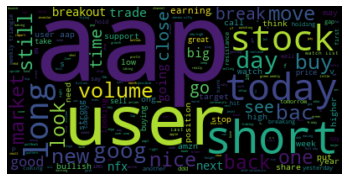

In [711]:
# Just for fun

def plot_wordcloud(series,output_filename='wordcloud'):

    from wordcloud import WordCloud

    wordcloud = WordCloud().generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(data['Text'],'overall-wordcloud')
